In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./datasets/bacteria_list_200.csv')
df

,Name,Family,Where Found,Harmful to Humans
0,Escherichia coli,Enterobacteriaceae,Intestinal tract,Yes
1,Staphylococcus aureus,Staphylococcaceae,"Skin, nasal passages",Yes
2,Lactobacillus acidophilus,Lactobacillaceae,Human mouth & intestine,No
3,Bacillus subtilis,Bacillaceae,Soil,No
4,Clostridium botulinum,Clostridiaceae,"Soil, improperly canned foods",Yes
...,...,...,...,...
194,Rathayibacter toxicus,Microbacteriaceae,Infected grasses,Yes
195,Simonsiella muelleri,Simonsiellaceae,Animal mucous membranes,No
196,Tepidimonas arfidensis,Comamonadaceae,Thermal springs,No
197,Ulvibacter litoralis,Flavobacteriaceae,Marine environments,No


#### 결측치, 중복치, 이상치 등 전처리 과정 진행

In [2]:
df.isna().sum() # 결측치 x 

Name                 0
Family               0
Where Found          0
Harmful to Humans    0
dtype: int64

In [3]:
df.duplicated().sum()

3

In [4]:
df.drop_duplicates()

,Name,Family,Where Found,Harmful to Humans
0,Escherichia coli,Enterobacteriaceae,Intestinal tract,Yes
1,Staphylococcus aureus,Staphylococcaceae,"Skin, nasal passages",Yes
2,Lactobacillus acidophilus,Lactobacillaceae,Human mouth & intestine,No
3,Bacillus subtilis,Bacillaceae,Soil,No
4,Clostridium botulinum,Clostridiaceae,"Soil, improperly canned foods",Yes
...,...,...,...,...
194,Rathayibacter toxicus,Microbacteriaceae,Infected grasses,Yes
195,Simonsiella muelleri,Simonsiellaceae,Animal mucous membranes,No
196,Tepidimonas arfidensis,Comamonadaceae,Thermal springs,No
197,Ulvibacter litoralis,Flavobacteriaceae,Marine environments,No


In [5]:
df.columns = ['Name', 'Family' , 'Which' , 'Harmful' ]
df.reset_index()

,index,Name,Family,Which,Harmful
0,0,Escherichia coli,Enterobacteriaceae,Intestinal tract,Yes
1,1,Staphylococcus aureus,Staphylococcaceae,"Skin, nasal passages",Yes
2,2,Lactobacillus acidophilus,Lactobacillaceae,Human mouth & intestine,No
3,3,Bacillus subtilis,Bacillaceae,Soil,No
4,4,Clostridium botulinum,Clostridiaceae,"Soil, improperly canned foods",Yes
...,...,...,...,...,...
194,194,Rathayibacter toxicus,Microbacteriaceae,Infected grasses,Yes
195,195,Simonsiella muelleri,Simonsiellaceae,Animal mucous membranes,No
196,196,Tepidimonas arfidensis,Comamonadaceae,Thermal springs,No
197,197,Ulvibacter litoralis,Flavobacteriaceae,Marine environments,No


In [6]:
df.duplicated().sum()
df = df.drop_duplicates()
df

,Name,Family,Which,Harmful
0,Escherichia coli,Enterobacteriaceae,Intestinal tract,Yes
1,Staphylococcus aureus,Staphylococcaceae,"Skin, nasal passages",Yes
2,Lactobacillus acidophilus,Lactobacillaceae,Human mouth & intestine,No
3,Bacillus subtilis,Bacillaceae,Soil,No
4,Clostridium botulinum,Clostridiaceae,"Soil, improperly canned foods",Yes
...,...,...,...,...
194,Rathayibacter toxicus,Microbacteriaceae,Infected grasses,Yes
195,Simonsiella muelleri,Simonsiellaceae,Animal mucous membranes,No
196,Tepidimonas arfidensis,Comamonadaceae,Thermal springs,No
197,Ulvibacter litoralis,Flavobacteriaceae,Marine environments,No


In [7]:
df.duplicated().sum()
# df

0

In [8]:
h_enc_df = df.copy()

In [9]:
#### 그 전에 수치형 데이터로 변경하자 -> list 즉  Label Encoder 시행 
from sklearn.preprocessing import LabelEncoder
h_encoder = LabelEncoder()

# 파이썬 리스트로 전달 
targets = h_encoder.fit_transform(df['Harmful'].tolist())
h_enc_df['Harmful'] = targets
h_enc_df

# 범주형 데이터를 수치형 데이터로 전달하기 위해 LabelEncoder() 함수 사용 
w_encoder = LabelEncoder()
whiches = w_encoder.fit_transform(df['Which'].tolist())
h_enc_df['Which'] = whiches
h_enc_df

f_encoder = LabelEncoder()
fam = f_encoder.fit_transform(df['Family'].tolist())
h_enc_df['Family'] = fam

n_encoder = LabelEncoder()
names = n_encoder.fit_transform(df['Name'].tolist())
h_enc_df['Name'] = names
h_enc_df

,Name,Family,Which,Harmful
0,55,29,60,2
1,158,84,83,2
2,96,45,41,1
3,12,8,84,1
4,36,20,86,2
...,...,...,...,...
194,144,52,57,2
195,156,81,4,1
196,168,21,102,1
197,173,31,63,1


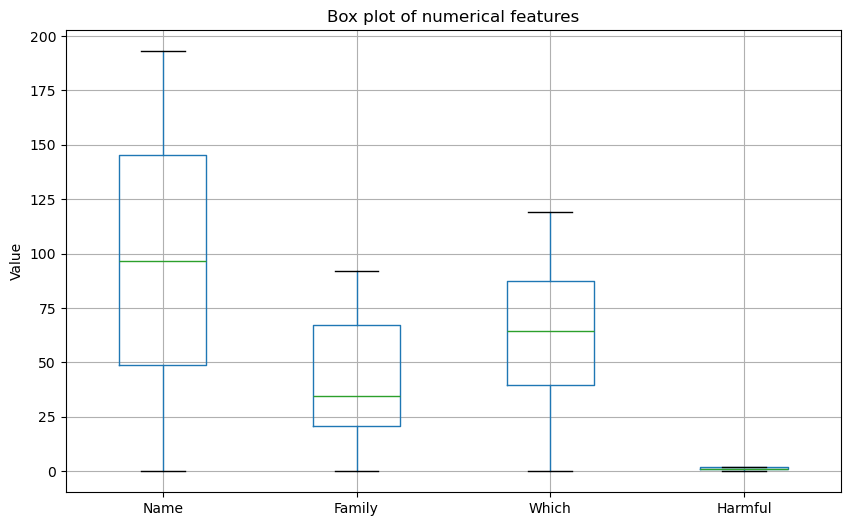

In [10]:
#### 박스 플롯으로 이상치 검사 
# 박스 플롯 그리기
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # 그래프 크기 설정
h_enc_df.boxplot(column=['Name', 'Family', 'Which', 'Harmful'])
plt.title('Box plot of numerical features')
plt.ylabel('Value')
plt.grid(True)
plt.show()


In [11]:
# ### 이상치 없는 것으로 확인 됨 
# ### 그래도 혹시 모르니 표준 정규 분포로 모아서 삭제 시켜보자 기존 피처 개수 196개 
# from sklearn.preprocessing import StandardScaler
# # 데이터의 평균을 0, 분산을 1이 되도록 표준 정규분포를 따르게 하는 스케일링 
# # ± 1.96을 벗어나면 이상치로 판단한다.
# std = StandardScaler()
# std_h = std.fit_transform(h_enc_df[['Harmful']])
# std_h # 표준 정규 분포 결과 

In [12]:
# h_enc_df['Harmful'] = std_h
# h_enc_df

In [13]:
# h_enc_df = h_enc_df[(h_enc_df['Harmful'] >= -1.96) & (h_enc_df['Harmful'] <= 1.96)]
# h_enc_df

In [14]:
h_encoder.classes_

array([' Yes', 'No', 'Yes'], dtype='<U4')

In [15]:
h_encoder.inverse_transform(h_enc_df['Harmful'])

array(['Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', ' Yes', 

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()

features, targets = h_enc_df.iloc[:,:-1] , h_enc_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

dtc.fit(X_train.values, y_train.values) 

DecisionTreeClassifier()

In [18]:
targets

0      2
1      2
2      1
3      1
4      2
      ..
194    2
195    1
196    1
197    1
198    2
Name: Harmful, Length: 196, dtype: int64

In [19]:
from sklearn.tree import export_graphviz

export_graphviz(dtc, out_file='./images/harmful_dtc01.dot', class_names=h_encoder.classes_, feature_names=features.columns, 
                impurity=True, filled=True)

In [22]:
import graphviz

with open('./images/harmful_dtc01.dot') as f:
    harmful_dtc01 = f.read()

harmful_dtc01_graph = graphviz.Source(harmful_dtc01)

In [23]:
harmful_dtc01_graph.render(filename="harmful_dtc01", directory="./images", format="png")

'images\\harmful_dtc01.png'

<img src="./images/harmful_dtc01.png">

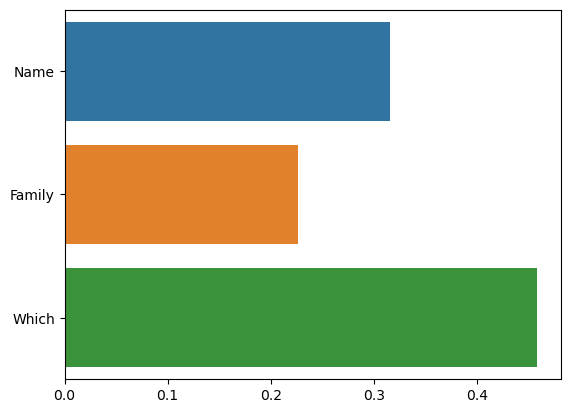

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

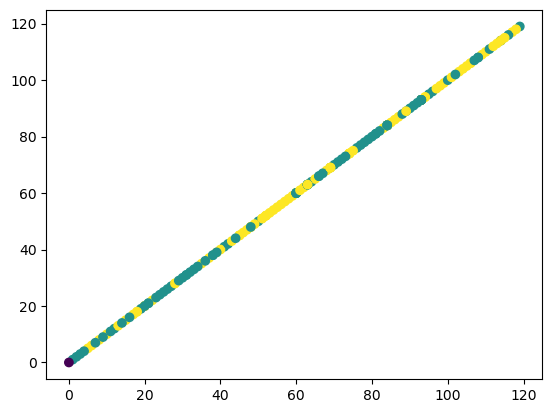

In [25]:
plt.scatter(features.iloc[:,2], features.iloc[:,-1], c=targets)

In [26]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)


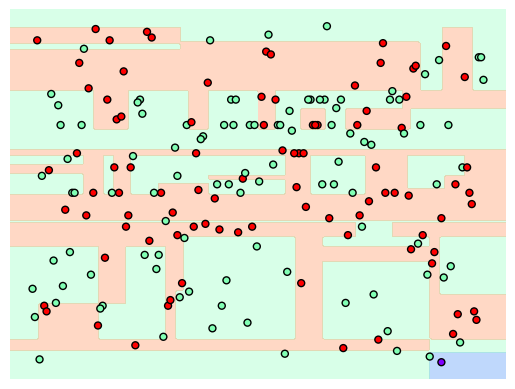

In [31]:
features_2_4 = features.iloc[:,[0,2]]
visualize_boundary(dtc, features_2_4, targets)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()

features, targets = h_enc_df.iloc[:,:-1] ,h_enc_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

dtc.fit(X_train.values, y_train.values) 

DecisionTreeClassifier()

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, dtc.predict(X_test.values))

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.